# Old World + Leviathan



In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters
import copy

In [2]:
def simulation(world, n_sim):
    imperial_density = []
    
    for sim in range(n_sim):
        world.reset()
        imperial_density.append(analysis.ImperialDensity(world))
        for step in range(1500):
            world.step()
            imperial_density[sim].sample()
            if (world.step_number)%500 == 0:
                print('simulation: {:2d}\tstep: {:4d}'.format(sim+1,world.step_number))
                #analysis.plot_ultrasocietal_traits(world)
                #analysis.plot_polities(world)
                #LEVIATHAN
                #analysis.plot_yields(world)
                #analysis.plot_depletion(world)
                #analysis.plot_comfort(world)
                #analysis.plot_expectations(world)
                #analysis.plot_paradigms(world)
            
    return imperial_density

### Old World with Leviathan model added
To the Old World simulation of ultrasociety traits and the spread of military tech, Leviathan adds simple simulation of basic agriculture and soil depletion/regeneration according to land use rules held in paradigms that spread from community to community based on expectations that are themselves based on the feedback from communities already using that paradigm (akin to the feedback in the "structuring structures" of Bourdieu's habitus).

Communities become more or less comfortable according to the yields returned through paradigm rules and current soil depletion, with communities of higher ultrasociety needing higher yields to remain comfortable. When uncomfortable, communities mutate a new paradigm with randomized rules added or adopt a paradigm followed by their neighbours. Paradigms also spread (like ultrasociety traits in the original model) on "ethnocide".

##### Hypotheses
H0: no significant difference between imperial denisity correlation in Old World model and in the Old World model with Leviathan added.
</br>H1: one-tailed positive significant difference between imperial denisity correlation in Old World model and in the Old World model with Leviathan added.

In [3]:
params = copy.deepcopy(default_parameters)

params = params._replace(spread_para_on_ethnocide=True)
# use the added Leviathan agricultural and paradigm spread models
params = params._replace(icono=True)
# simple contagion-style spread? 'Perfect' or 'FutureDiscounted'
# else None use feedback "structuring structure" style 'Icono'
params = params._replace(contagion=None)

params = params._replace(num_icono_loops=2)
params = params._replace(workrate_change=0.1)
params = params._replace(threshold=10)
params = params._replace(mut_amount=1)
params = params._replace(mutation_rate=0.01)

world = World.from_file(project_dir+'/data/old_world.yml', params)

# Check if simulation has been run before
#if os.path.isfile('./imperial_density.pkl'):
#    mean_impd = analysis.ImperialDensity.from_file(world, './imperial_density.pkl')
#else:
imperial_density = simulation(world, 10)
mean_impd_lev = analysis.ImperialDensity.mean(imperial_density)
mean_impd_lev.dump('./imperial_density_lev.pkl')

simulation:  1	step:  500
simulation:  1	step: 1000
simulation:  1	step: 1500
simulation:  2	step:  500
simulation:  2	step: 1000
simulation:  2	step: 1500
simulation:  3	step:  500
simulation:  3	step: 1000
simulation:  3	step: 1500
simulation:  4	step:  500
simulation:  4	step: 1000
simulation:  4	step: 1500
simulation:  5	step:  500
simulation:  5	step: 1000
simulation:  5	step: 1500
simulation:  6	step:  500
simulation:  6	step: 1000
simulation:  6	step: 1500
simulation:  7	step:  500
simulation:  7	step: 1000
simulation:  7	step: 1500
simulation:  8	step:  500
simulation:  8	step: 1000
simulation:  8	step: 1500
simulation:  9	step:  500
simulation:  9	step: 1000
simulation:  9	step: 1500
simulation: 10	step:  500
simulation: 10	step: 1000
simulation: 10	step: 1500


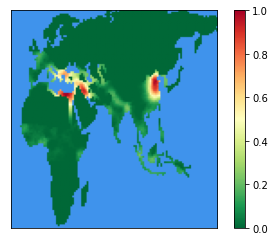

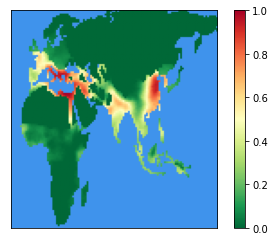

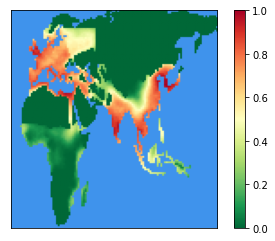

In [4]:
mean_impd_lev.plot_all()

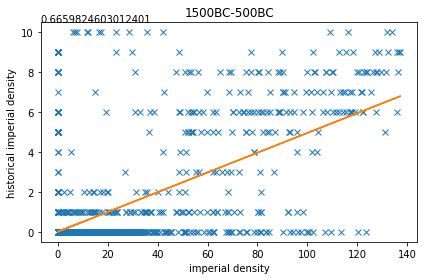

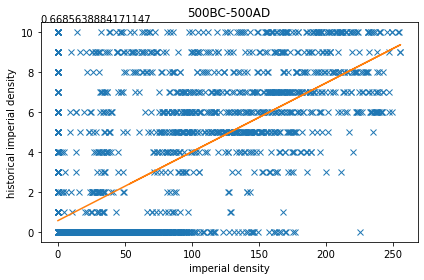

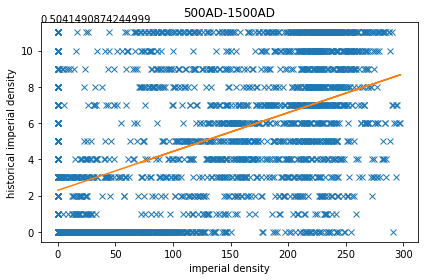

In [5]:
# Correlate with historical data
historical = analysis.HistoricalImperialDensity(world, data_file=project_dir+'/data/imperial_density_data.pkl')
#historical.plot_heatmap()
mean_r_lev, n_lev, BC_r_lev, BCAD_r_lev, AD_r_lev = historical.correlate(mean_impd_lev)

### Old World simulations (original model without Leviathan)

In [6]:
world = World.from_file(project_dir+'/data/old_world.yml', default_parameters)

# Check if simulation has been run before
#if os.path.isfile('./imperial_density.pkl'):
#    mean_impd = analysis.ImperialDensity.from_file(world, './imperial_density.pkl')
#else:
imperial_density = simulation(world, 10)
mean_impd = analysis.ImperialDensity.mean(imperial_density)
mean_impd.dump('./imperial_density.pkl')

simulation:  1	step:  500
simulation:  1	step: 1000
simulation:  1	step: 1500
simulation:  2	step:  500
simulation:  2	step: 1000
simulation:  2	step: 1500
simulation:  3	step:  500
simulation:  3	step: 1000
simulation:  3	step: 1500
simulation:  4	step:  500
simulation:  4	step: 1000
simulation:  4	step: 1500
simulation:  5	step:  500
simulation:  5	step: 1000
simulation:  5	step: 1500
simulation:  6	step:  500
simulation:  6	step: 1000
simulation:  6	step: 1500
simulation:  7	step:  500
simulation:  7	step: 1000
simulation:  7	step: 1500
simulation:  8	step:  500
simulation:  8	step: 1000
simulation:  8	step: 1500
simulation:  9	step:  500
simulation:  9	step: 1000
simulation:  9	step: 1500
simulation: 10	step:  500
simulation: 10	step: 1000
simulation: 10	step: 1500


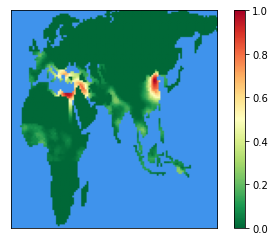

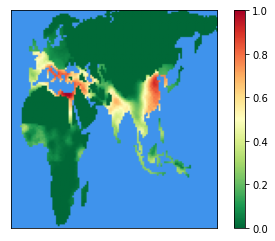

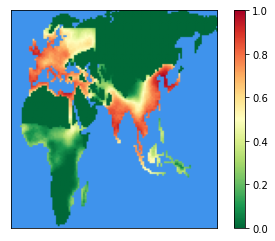

In [7]:
mean_impd.plot_all()

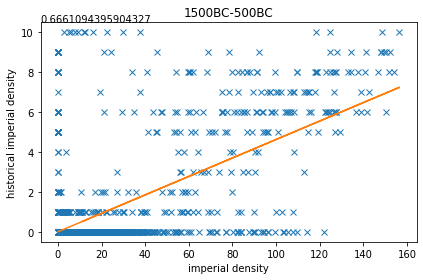

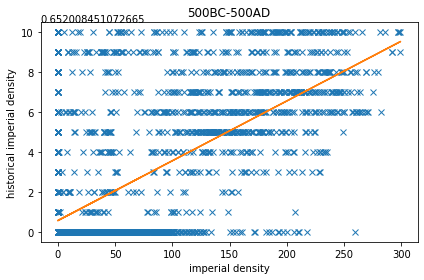

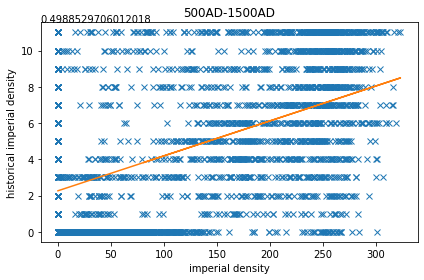

In [8]:
# Correlate with historical data
historical = analysis.HistoricalImperialDensity(world, data_file=project_dir+'/data/imperial_density_data.pkl')
#historical.plot_heatmap()
mean_r_ow, n_ow, BC_r_ow, BCAD_r_ow, AD_r_ow = historical.correlate(mean_impd)

### Hypothesis significance testing

H0: no significant difference between mean_r_lev and mean_r_ow
</br>H1: one-tailed positive significant difference (95% confidence)

In [9]:
from scipy.stats import norm
import numpy as np

#fisher's z transformation of pearson's r
#fz_lev = .5 * (np.log(1+r_ow) - np.log(1-r_ow))
fz_ow = np.arctanh(mean_r_ow) #equivalent
fz_lev = np.arctanh(mean_r_lev)
print ("Fisher's z Old World: ", fz_ow)
print ("Fisher's z plus Leviathan: ", fz_lev)
#TODO--should multiply by the number of tests since the inbuilt aggregator averages out???
#OR--should probably do individual tests and merge myself?

#find signficance
#TODO--for each era instead? (so no rounding used in correlate)
significance = .95
alpha = 1 - significance
zright = norm.ppf(1-alpha,0,1)
print (f'significance: {significance}, alpha: {alpha:.3f}, z to beat: {zright:.3f}')
z = (fz_lev - fz_ow) / np.sqrt( (1 / (n_lev - 3)) + (1 / (n_ow - 3)))
if zright < z:
    print (f'CONCLUSION: H1 confirmed, z = {z:.3f}')
else:
    print (f'CONCLUSION: Null hypothesis confirmed, z = {z:.3f}')

Fisher's z Old World:  0.7020335312844695
Fisher's z plus Leviathan:  0.7135505745962173
significance: 0.95, alpha: 0.050, z to beat: 1.645
CONCLUSION: Null hypothesis confirmed, z = 0.620
